In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [9]:
dates= []
prices= []

def get_data(filename):
    with open(filename,'r') as csvfile:
        csvfilereader = csv.reader(csvfile)
        next(csvfilereader)
        for row in csvfilereader:
            dates.append(int(row[0].split('/')[2]))
            prices.append(float(row[1]))
    return


In [10]:
def predict_prices(dates,prices,x):
    dates = np.reshape(dates, (len(dates),1))
    
    svr_lin = SVR(kernel = 'linear', C=1e3)
    svr_poly = SVR(kernel= 'poly', C=1e3,degree=2)
    svr_rbf = SVR(kernel = 'rbf', gamma = 0.1)
    
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    
    plt.scatter(dates,prices,color='black',label='Data')
    plt.plot(dates,svr_rbf.predict(dates),color='red',label='RBF model')
    plt.plot(dates,svr_poly.predict(dates),color = 'green',label='Polynomial model')
    plt.plot(dates,svr_lin.predict(dates),color= 'blue',label= 'linear model')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_poly.predict(x)[0], svr_lin.predict(x)[0]


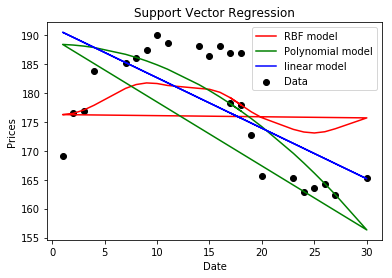

(175.12475559700354, 158.42336888877827, 166.03391304333724)


In [11]:
get_data('HistoricalQuotes.csv')
predictedprices = predict_prices(dates,prices,29)
print predictedprices

